In [1]:
import pandas as pd
import nltk
from nltk.corpus import inaugural
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from nltk.corpus import inaugural
inaugural.fileids()

for fileid in inaugural.fileids():
    print(fileid)
    print("char",len(inaugural.raw(fileid)))
    print("words",len(inaugural.words(fileid)))
    print("sents",len(inaugural.sents(fileid)))

1789-Washington.txt
char 8619
words 1538
sents 24
1793-Washington.txt
char 791
words 147
sents 4
1797-Adams.txt
char 13877
words 2585
sents 37
1801-Jefferson.txt
char 10137
words 1935
sents 42
1805-Jefferson.txt
char 12908
words 2384
sents 45
1809-Madison.txt
char 7001
words 1265
sents 21
1813-Madison.txt
char 7157
words 1304
sents 33
1817-Monroe.txt
char 19887
words 3693
sents 122
1821-Monroe.txt
char 26326
words 4909
sents 129
1825-Adams.txt
char 17741
words 3150
sents 74
1829-Jackson.txt
char 6817
words 1208
sents 25
1833-Jackson.txt
char 7058
words 1267
sents 30
1837-VanBuren.txt
char 23417
words 4171
sents 95
1841-Harrison.txt
char 49700
words 9165
sents 210
1845-Polk.txt
char 28716
words 5196
sents 153
1849-Taylor.txt
char 6605
words 1182
sents 22
1853-Pierce.txt
char 20081
words 3657
sents 104
1857-Buchanan.txt
char 16815
words 3098
sents 89
1861-Lincoln.txt
char 21017
words 4005
sents 138
1865-Lincoln.txt
char 3926
words 785
sents 27
1869-Grant.txt
char 6503
words 1239
sents 41

Part-1-1: Divide it into two datasets: preWWI (till 1913) and postWWI (after 1917).

In [3]:
preWWI_lst = [] #Create list to collect preWWI (till 1913) fileids
postWWI_lst =[] #Create list to collect postWWI (after 1917) fileids

for fileid in inaugural.fileids():
    if int(fileid[0:4])<=1913: #Collect the fileids before or on 1913
        preWWI_lst.append(fileid)
    elif int(fileid[0:4]) >= 1917: #Collect the fileids after on 1917
        postWWI_lst.append(fileid)
    else:
        pass

##Part-1-2: Normalize the text for each dataset by down-casing all words (but no stemming or lemmatization).

In [4]:
pre_words_lst = []
for i in range(len(preWWI_lst)):
    pre_words_lst.append(list(inaugural.words(preWWI_lst[i])))
    
pre_words_lst2 = []
for i in range(len(pre_words_lst)):
    pre_words_lst2 = pre_words_lst2 + pre_words_lst[i]    
pre_words_lst2 = [word.lower() for word in pre_words_lst2]
print(len(pre_words_lst2))

pre_words_lst3 = []
for word in pre_words_lst2:
    if word in stopwords.words('english') or len(word)<=2:
        pass
    else:
        pre_words_lst3.append(word)
print(len(pre_words_lst3))

89718
38423


In [5]:
post_words_lst = []
for i in range(len(postWWI_lst)):
    post_words_lst.append(list(inaugural.words(postWWI_lst[i])))
    
post_words_lst2 = []
for i in range(len(post_words_lst)):
    post_words_lst2 = post_words_lst2 + post_words_lst[i]    
post_words_lst2 = [word.lower() for word in post_words_lst2]
print(len(post_words_lst2))

post_words_lst3 = []
for word in post_words_lst2:
    if word in stopwords.words('english') or len(word)<=2:
        pass
    else:
        post_words_lst3.append(word)
print(len(post_words_lst3))

56017
23719


##Part-1-3: For each dataset, compute the frequency distribution (i.e., probability) of unigrams and bigrams.  Then compute the following and write two output files -- one for unigrams and one for bigrams.

##Unigram

In [6]:
#Count the frequency of words appearing preWWI dataset into dictionary
pre_fduni = nltk.FreqDist(pre_words_lst2)
post_fduni = nltk.FreqDist(post_words_lst2)

#Sort out the top 200 unigrams from pre-WWI
count=0
pre_top_lst=[]
for k in sorted(pre_fduni, key=pre_fduni.get, reverse=True):
    pre_top_lst.append(k)
    count+=1
    if count>199:
        break

#Sort out the top 200 from post-WWI        
count=0
post_top_lst=[]
for k in sorted(post_fduni, key=post_fduni.get, reverse=True):
    post_top_lst.append(k)
    count+=1
    if count>199:
        break

#Union the Unigrams from pre-WWI and post-WWI datasets
union_top_lst = set(pre_top_lst+post_top_lst)
with open("unigrams.txt","w") as f:
    f.write("{0:<17}{1}    {2}\n".format("unigram", "pre-WWI","post_WWI"))
    f.write("%s\n"%("="*37))
    for item in sorted(union_top_lst):
        if len(item)>2 and item not in stopwords.words():
            f.write("{0:<17}{1:0.7f}  {2:0.7f}\n".format(item, 
                  pre_fduni[item]/ len(pre_words_lst2)
                  , post_fduni[item]/len(post_words_lst2)))        

##bigram

In [7]:
#Generate bigram from unigrams list
pre_bigrams = list(nltk.bigrams(pre_words_lst2))
#Exploit the FreqDist function to find out the Frequency of Bigrams from pre-WWI dataset
pre_fdbi = nltk.FreqDist(pre_bigrams)

#Sort out the top 1000 Bigrams from pre-WWI
count=0
pre_top_lst=[]
value=0
for k in sorted(pre_fdbi, key=pre_fdbi.get, reverse=True):
    pre_top_lst.append(k)
    count+=1    
    if count==999:
        value = pre_fdbi[k]
        #print(count)
    elif count>999:
        if value == pre_fdbi[k]:
            pass
        else:
            break

#Generate bigram from unigrams list            
post_bigrams = list(nltk.bigrams(post_words_lst2))
#Exploit the FreqDist function to find out the Frequency of Bigrams from post-WWI dataset
post_fdbi = nltk.FreqDist(post_bigrams)
#Sort out the top 1000 Bigrams from post-WWI
count=0
post_top_lst=[]
for k in sorted(post_fdbi, key=post_fdbi.get, reverse=True):
    post_top_lst.append(k)
    count+=1
    if count==999:
        value = post_fdbi[k]
        #print(count)
    elif count>999:
        if value == post_fdbi[k]:
            pass
        else:
            break
        
union_top_lst=set(post_top_lst+pre_top_lst)  
n=0
k_lst=[]
v1_lst=[]
v2_lst=[]

with open("bigrams.txt","w") as f:
    f.write("{0:<29}{1}     {2}\n".format("bigram", "pre-WWI","post_WWI"))
    f.write("%s\n"%("="*50))
    for item in sorted(union_top_lst):
        if len(item[0])>2 and len(item[1])>2 and item[0] not in stopwords.words() and item[1] not in stopwords.words():
            n+=1
            #print(n)
            k_lst.append(str(item))
            v1_lst.append(pre_fdbi[item]/ len(pre_bigrams))
            v2_lst.append(post_fdbi[item]/len(post_bigrams))
            f.write("{0:<28}{1: 0.7f}   {2:0.7f}\n".format(str(item), pre_fdbi[item]/ len(pre_bigrams),post_fdbi[item]/len(post_bigrams)))
f.close()            

##Barplot the top 50 frequency of bigrams

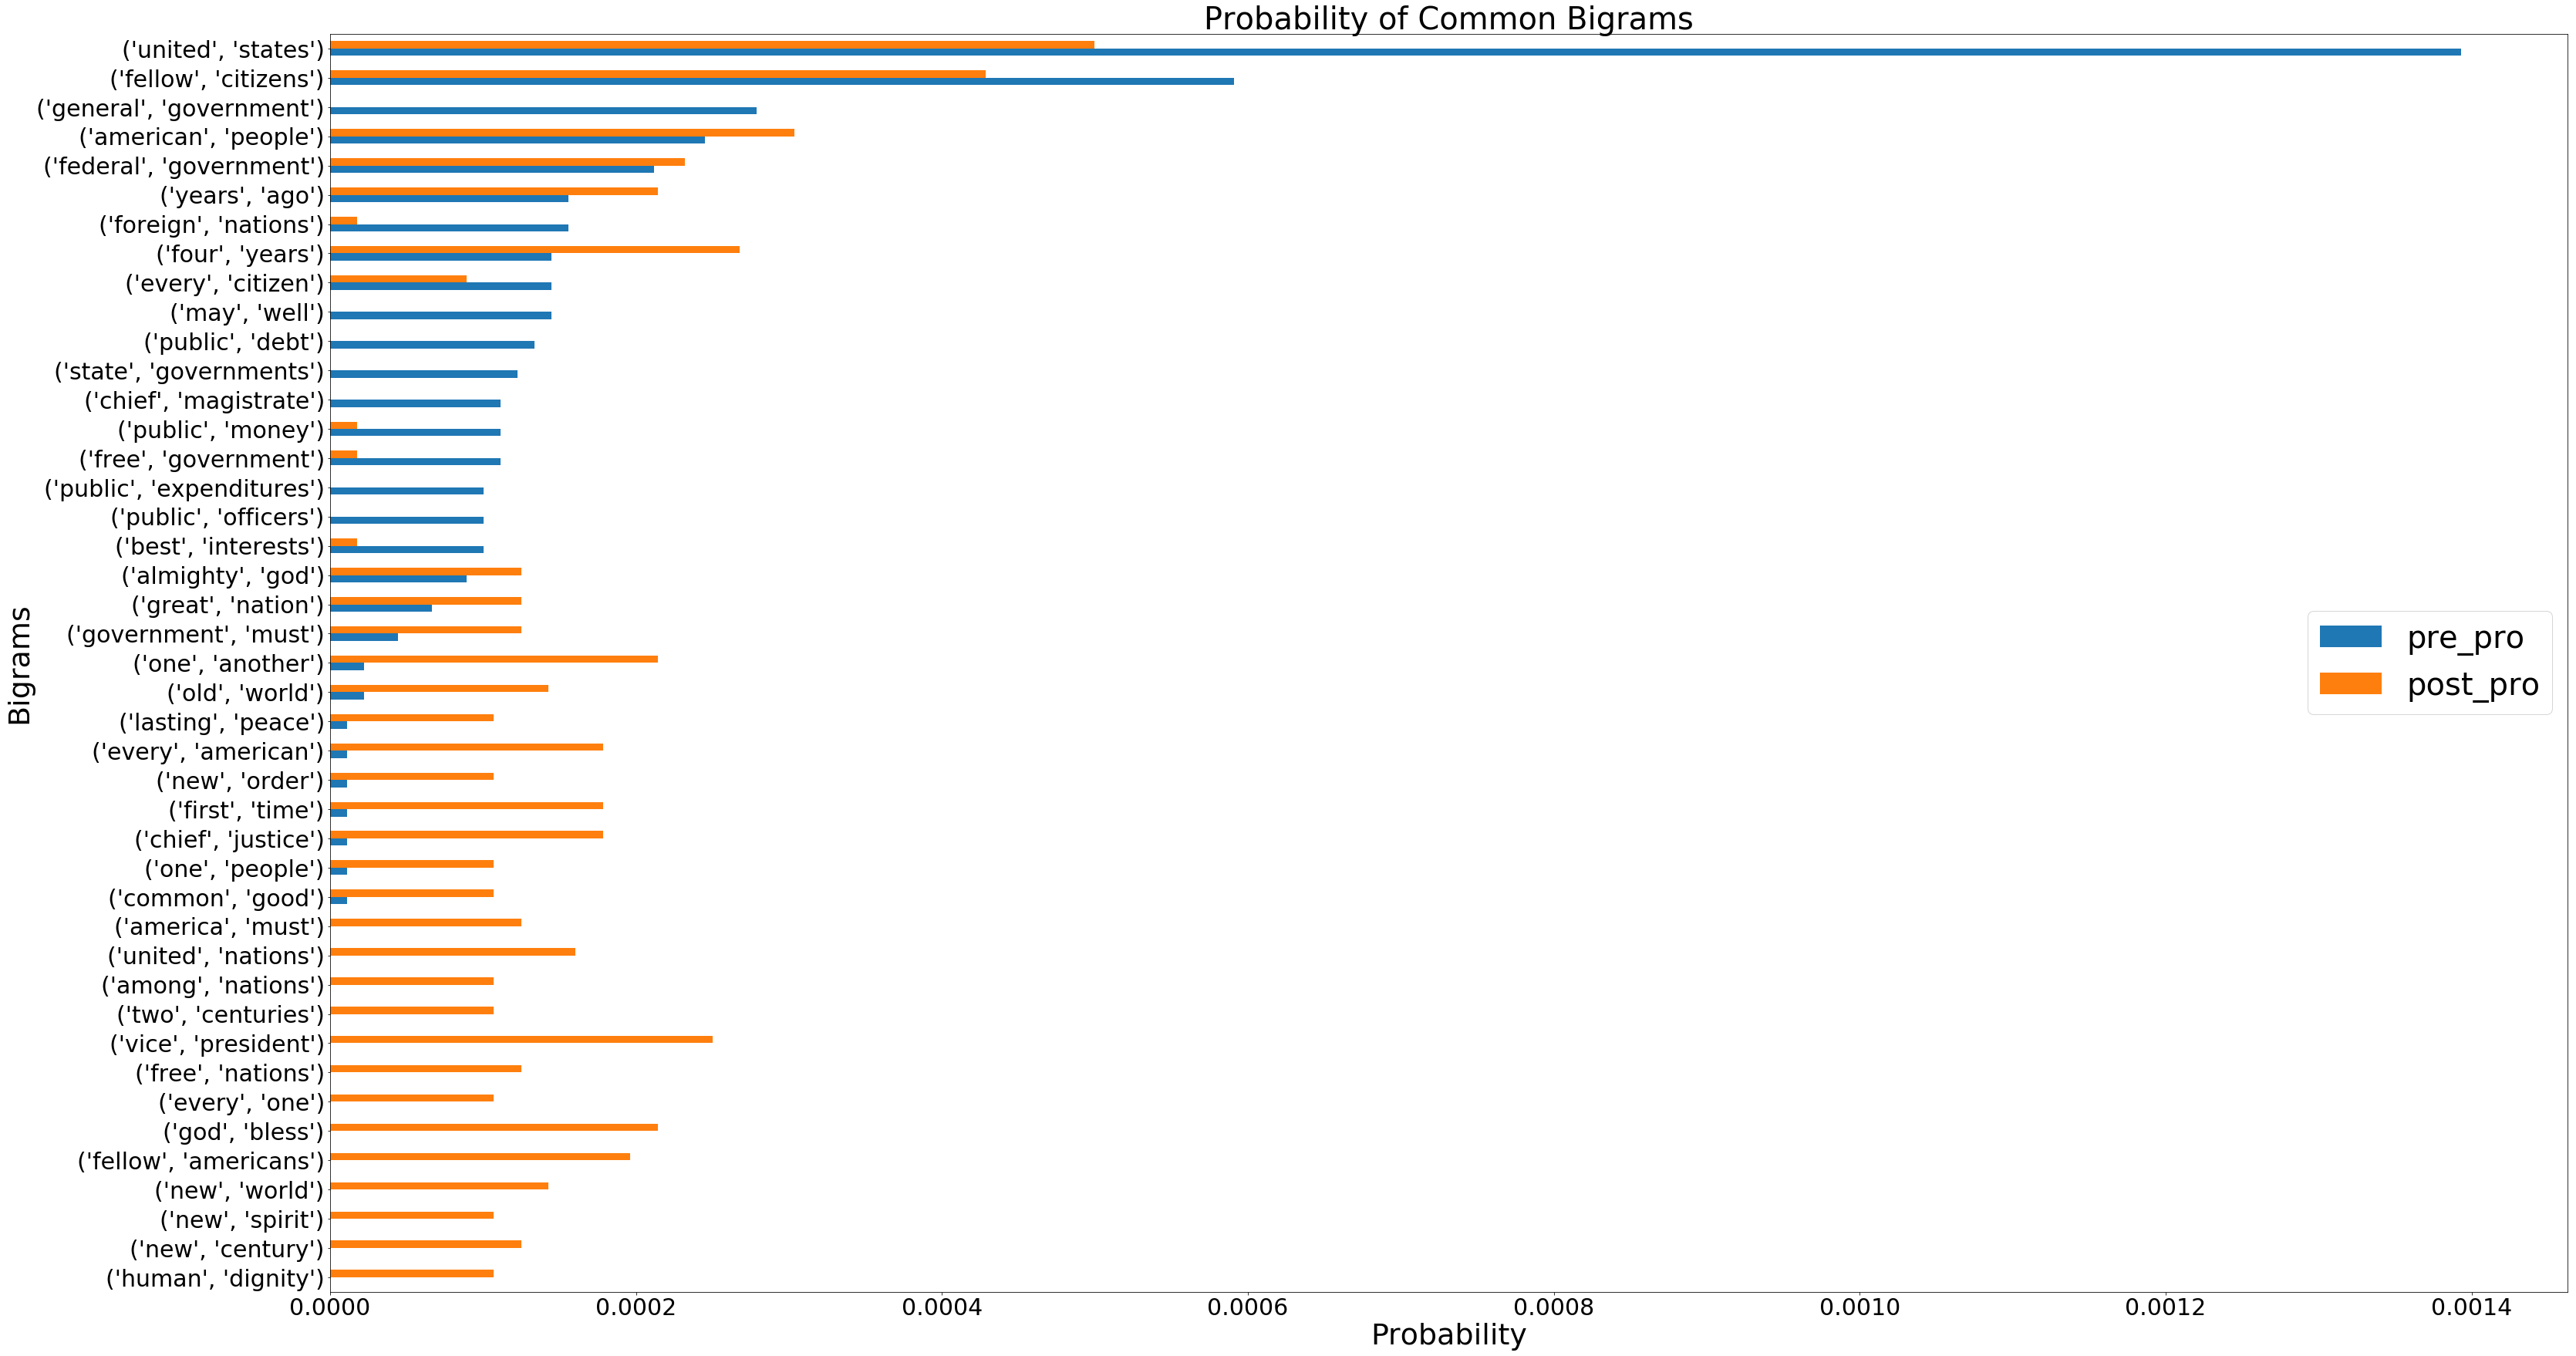

In [8]:
bigram_df =pd.DataFrame(list(zip(k_lst,v1_lst,v2_lst)), columns=["bigrams","pre_pro","post_pro"])
bigram_df = bigram_df.sort_values(by=["pre_pro"])
fig=plt.figure(figsize=(52,30))
ax=fig.add_subplot(111)
bigram_df.plot(x=bigram_df.bigrams,kind='barh',legend=False, ax=ax)
plt.title("Probability of Common Bigrams", size=40 )
plt.xlabel("Probability", size=38)
plt.ylabel("Bigrams", size=38)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.legend(loc='center right', fontsize=40)
fig.savefig('Top_50_Bigram_plot.png')
plt.show()

In [42]:
def make_cfdist(text, size=3):
    """
    Extract unigrams and two-word tuples in the windows and create a 
    FrequencyDist dictionary for both (and returns them in a list)
    """
    unigrams = []
    tuples = []
    # Scan over windows of the appropriate size.
    for center in range(size, len(text)-size):
        # enter the coocurrence (center word and each of all other words) in the dictionary
        wunis = set()
        wtuples = set() # for tuples in this context; set is to count only once
        thisword = text[center]
        
        # iterate though the test of the window
        for i in range(1, size+1): # i starts from 1 (center +/- i)
            nextleft = text[center-i]
            nextright = text[center+i]
            # add them next word in this window's unigram set
            wunis.add(nextleft)
            wunis.add(nextright)
            # create the next left tuple
            if not thisword == nextleft:
                if thisword < nextleft:
                    tup = (thisword,nextleft)
                else:
                    tup = (nextleft,thisword)
                # and add it in this window's tuple set
                wtuples.add(tup) #
            # create the next right tuple
            if not thisword == nextright:
                if thisword < nextright:
                    tup = (thisword,nextright)
                else:
                    tup = (nextright,thisword)
                # and add it in this window's tuple set
                wtuples.add(tup) #
        
        # add all unigrams in the text tuples list
        for wuni in wunis:
            unigrams.append(wuni)
        # add all tuples in the text tuples list
        for wtup in wtuples:
            tuples.append(wtup)
            
    # create a frequency dictionary from unigrams and tuples
    ufd = nltk.FreqDist(unigrams)
    cfd = nltk.FreqDist(tuples)
    # and return the dictionaries in a list
    return [ufd, cfd]

In [47]:
text= "These approaches are less performant, but they will provide correct behavior. They will be much less performant than copy and update or the new unpacking because they iterate through each key-value pair at a higher level of abstraction, but they do respect the order of precedence (latter dicts have precedence)"
from nltk import word_tokenize
text = word_tokenize(text)
ufd, cfd = make_cfdist(text, size=3)

In [49]:
cfd

FreqDist({('(', 'dicts'): 2,
          ('(', 'have'): 1,
          ('(', 'latter'): 2,
          ('(', 'of'): 2,
          ('(', 'order'): 2,
          ('(', 'precedence'): 2,
          (')', 'dicts'): 1,
          (',', 'abstraction'): 2,
          (',', 'are'): 1,
          (',', 'but'): 4,
          (',', 'do'): 2,
          (',', 'less'): 2,
          (',', 'level'): 2,
          (',', 'of'): 2,
          (',', 'performant'): 2,
          (',', 'they'): 4,
          (',', 'will'): 2,
          ('.', 'They'): 2,
          ('.', 'be'): 2,
          ('.', 'behavior'): 2,
          ('.', 'correct'): 2,
          ('.', 'provide'): 2,
          ('.', 'will'): 2,
          ('These', 'less'): 1,
          ('They', 'be'): 2,
          ('They', 'behavior'): 2,
          ('They', 'correct'): 2,
          ('They', 'much'): 2,
          ('They', 'will'): 2,
          ('a', 'at'): 2,
          ('a', 'higher'): 2,
          ('a', 'key-value'): 2,
          ('a', 'level'): 2,
          ('a', 'of')

In [ ]:
#pre_df.set_index("tokens").join(post_df.set_index("tokens"),)
pre_post_df = pd.merge(pre_df, post_df, on="tokens")
pre_post_df.columns = ["unigram", "pre-WWI","post-WWI" ]
pre_post_df = pre_post_df.sort_values(by = ["pre-WWI"], ascending=False)
pre_post_df = pre_post_df[0:200]
pre_post_df.sort_values(by = ["unigram"])

In [40]:
words_lst3[1]

'-'

In [13]:
#Iterating the preWWI list to down-casing all words
for i in range(len(preWWI_lst)):
    preWWI_lst[i] = inaugural.raw(preWWI_lst[i]).lower() #Store the preWWI data (ALL words) to the same list preWWI_lst

#Iterating the postWWI_lst list to down-casing all words
for i in range(len(postWWI_lst)):
    postWWI_lst[i] = inaugural.raw(postWWI_lst[i]).lower() #Store the postWWI data (ALL words) to the same list postWWI_lst


##Part-1-3: For each dataset, compute the frequency distribution (i.e., probability) of unigrams and bigrams.  Then compute the following and write two output files -- one for unigrams and one for bigrams.

##Unigram

In [32]:
import nltk
from nltk import word_tokenize, sent_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/KevQuant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
words_lst=[]
for i in range(len(preWWI_lst)):
    words_lst.append( word_tokenize(preWWI_lst[i]))

words_lst2=[]
for i in range(len(words_lst)):
    words_lst2 +=words_lst[i]

words_lst3=[]
for word in words_lst2:
    if (len(word)<=2) or (word in stopwords.words()):
        pass
    else:
        words_lst3.append(word)

fduni = nltk.FreqDist(words_lst3)
len(fduni)

NameError: name 'stopwords' is not defined

In [66]:
len(preWWI_lst)

32

In [67]:
words_dict = {}
for words in preWWI_lst:
    words = word_tokenize(words)
    for word in words:
        if word in stopwords.words() or len(word)<=2:
            pass
        else:
            if word.strip() in words_dict.keys():
                words_dict[word.strip()]+=1
            else:
                words_dict[word.strip()]=1

    

6769

In [73]:
words_dict2 = {}
for k,v in words_dict.items():
    if v >= 200:
        pass
    else:
        words_dict2[k] = v
words_dict2 

6761

In [ ]:
df = pd.DataFrame(list(zip(words_dict2.keys(), words_dict2.values())), columns =["tokens", "freq"])
df.sort_values(by=["tokens"], ascending=True)

In [107]:
preWWI_words=[]
for i in range(len(preWWI_lst)):
    preWWI_words = preWWI_words +preWWI_lst[i]
words = word_tokenize(preWWI_words)
freq_uni = nltk.FreqDist(words)
df = pd.DataFrame(list(zip(freq_uni.keys(), freq_uni.values())), columns = ["tokens", "freq"])
#df.drop(labels=[5])
df.sort_values(by = ["tokens"])
#df.drop(labels=[5])
#df

TypeError: can only concatenate list (not "str") to list

In [111]:
preWWI_words = []
for i in range(len(preWWI_lst)):
    preWWI_words = preWWI_words  + [preWWI_lst[i]]

len(preWWI_words)

32

In [98]:
cnt =0
for words in preWWI_lst:
    cnt += len(words)
cnt

488573

In [117]:
aa = [["abced"], ["fuahf fiaha"]]

aa= aa[0]+aa[1]
word_tokenize(aa[0])

['abced']

In [132]:
words_lst=[]
for i in range(len(preWWI_lst)):
    words_lst.append( word_tokenize(preWWI_lst[i]))

words_lst2=[]
for i in range(len(words_lst)):
    words_lst2 +=words_lst[i]

fduni = nltk.FreqDist(words_lst2)
len(fduni)

6936

In [130]:
cnt=1
for words in words_lst:
    cnt += len(words)
cnt

89345

In [44]:
unigrams = inaugural.words()
print("unigrams:", len(unigrams))
bigrams = list(nltk.bigrams(unigrams))
print("bigram",len(bigrams))

unigrams: 145735
bigram 145734


In [45]:
unigrams

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

In [ ]:
fduni = nltk.FreqDist(unigrams)
print("length of unigrams Dict",len(fduni))

for (w,c) in fduni.items():
    print(w,c)

##Check out the frequency of each word link to another word next to it.

In [26]:
cfd =  nltk.ConditionalFreqDist(bigrams)
print(cfd["Fellow"].items())

dict_items([('-', 7), ('citizens', 16), ('Citizens', 1)])


## Get the Conditional Probabilities of 
##(freq("-") + freq("Fellow")) divided by (Total freq("fellow"))

In [27]:
cfd["Fellow"].freq("-")

0.2916666666666667